# Assignment 1

The goal of the assignment is to perform an intensive visual analysis of a real-life dataset and to find a good feature representation for the data.

The original problem statement was to build an algorithm to classify time series into one of two classes. The data sets contain approximately 5000 of time series (the size of the training subsample is 1320). Each series consists of values for 500 time points and belongs to class {-1} or {1} (see column Target). 

1. Load train and test data using pandas or numpy. 2 points.
2. Plot & analyze several training examples of each class using plt.plot (from matplotlib import pyplot as plt). 3 points.
3. Propose several features potentially useful for classification (for example, the maximal absolute value of a time series). 5 points. 
4. Calculate the proposed features using numpy and visualize the new representation of training examples (hint: ideally you will find a set of features with a small overlap between classes -1 and 1). 7 points.
5. Repeat steps 3-4 if needed.
6. Propose a simple decision rule using the proposed features (e.g. if feature_1 > 1 and feature_2 < 5 than class=-1). Estimate accuracy of classification using the test set. 3 points.

The solutions should be prepared as Jupyter notebooks.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()
from scipy import signal

# Importing train and test dataset

In [2]:
data_train = pd.read_csv('hw1_train.csv')
data_train.head()

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-1,-0.14040,0.17164,0.30204,0.23280,0.033853,-0.22418,-0.46999,-0.645400,-0.61770,...,-0.31997,0.39090,0.97483,1.258700,1.14330,0.64709,-0.049582,-0.690400,-0.97660,-0.79426
1,-1,0.33404,0.32225,0.45384,0.67185,0.887900,1.02050,1.05980,1.030300,0.95075,...,0.43519,-0.34650,-0.92491,-1.208700,-1.24800,-1.14000,-1.041800,-1.041800,-1.15960,-1.37570
2,-1,0.71669,0.74437,0.72591,0.66133,0.555220,0.41359,0.24658,0.065273,-0.12111,...,3.17100,2.27600,1.21950,0.081881,-1.05030,-2.09290,-2.983300,-3.675300,-4.13660,-4.33960
3,1,1.24030,1.33120,1.38660,1.38320,1.306000,1.14280,0.87861,0.532290,0.14002,...,-0.82026,-1.12460,-1.30200,-1.340600,-1.27140,-1.14640,-1.011300,-0.931220,-0.93450,-1.00130
4,-1,-1.15950,-1.20420,-1.16760,-1.03350,-0.818170,-0.55812,-0.29929,-0.093691,0.02277,...,0.66085,0.44144,0.20618,-0.006941,-0.14692,-0.18308,-0.112380,0.008987,0.13141,0.18627


In [3]:
data_test = pd.read_csv('hw1_test.csv')
data_test.head()

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-1,-0.79717,-0.664390,-0.37301,0.040815,0.52694,0.98429,1.3531,1.5781,1.6593,...,1.12080,0.722420,0.36207,0.092083,-0.081268,-0.21257,-0.39146,-0.66439,-1.073800,-1.56430
1,1,0.80485,0.634630,0.37347,0.038343,-0.34099,-0.74086,-1.1097,-1.3954,-1.5702,...,0.38640,0.049213,-0.25814,-0.510580,-0.683650,-0.77382,-0.78525,-0.71489,-0.560440,-0.31909
2,-1,0.72799,0.111280,-0.49912,-1.068600,-1.57840,-1.99050,-2.3020,-2.5034,-2.5852,...,0.39446,0.463680,0.50773,0.517170,0.504590,0.47627,0.43851,0.39446,0.339400,0.25539
3,-1,-0.23444,-0.502160,-0.73249,-0.946130,-1.13970,-1.32330,-1.4902,-1.6071,-1.6204,...,-0.95280,-0.929440,-0.92276,-0.929440,-0.909410,-0.83597,-0.69577,-0.47879,-0.188710,0.11974
4,-1,-0.17133,-0.062285,0.23583,0.710400,1.24000,1.64980,1.8763,1.8655,1.7038,...,0.77619,0.725500,0.69745,0.731970,0.808540,0.83982,0.73305,0.43752,-0.026585,-0.60221


# Plot & analyze several training examples of each class using plt.plot

In [4]:
df = pd.DataFrame(data_train)
df = df.drop('Target', axis = 1)

# Class {-1}

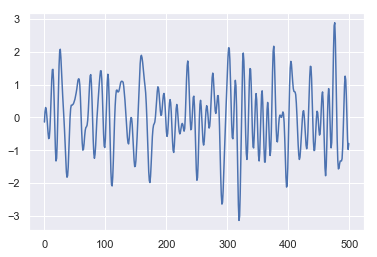

In [5]:
plt.plot(df.values[0])
plt.show()

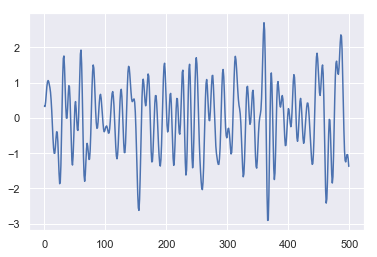

In [6]:
plt.plot(df.values[1])
plt.show()

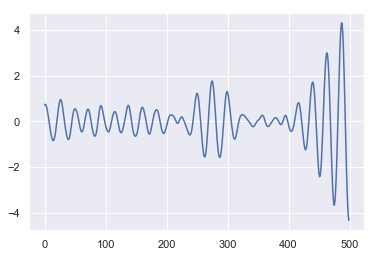

In [7]:
plt.plot(df.values[2])
plt.show()

# Class {1}

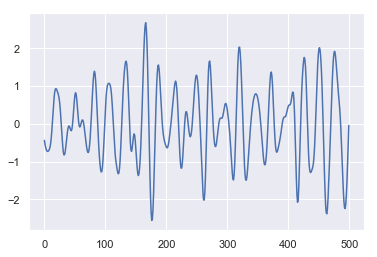

In [8]:
plt.plot(df.values[1299])
plt.show()

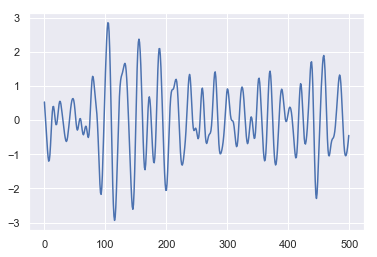

In [9]:
plt.plot(df.values[1300])
plt.show()

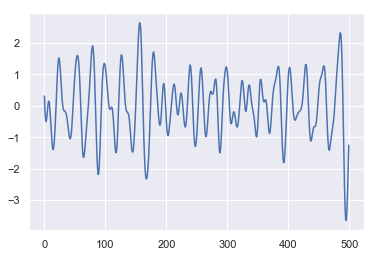

In [10]:
plt.plot(df.values[1301])
plt.show()

# Propose several features potentially useful for classification

As the main features I want to provide: mean, variance, max of FFT. First of all I want to split data test set, depending on labels

In [11]:
#calculates FFT for {-1} class
df_train_set_1 = data_train
df_train_set_1 = df_train_set_1[df_train_set_1.Target != 1]
df_train_set_1 = df_train_set_1.reset_index(drop = True)
df_2 = df_train_set_1.drop('Target', axis = 1)
d = np.zeros(len(df_2))
for i in range(len(df_2)):
    d[i] = abs(np.fft.fft(df_2.values[i], norm ='ortho')).max()
#d    

In [12]:
#Calculates FFT for {1} class 
df_train_set_2 = data_train
df_train_set_2 = df_train_set_2[df_train_set_2.Target != -1]
df_train_set_2 = df_train_set_2.reset_index(drop = True)
df_3 = df_train_set_2.drop('Target', axis = 1)
c = np.zeros(len(df_3))
for i in range(len(df_3)):
    c[i] = abs(np.fft.fft(df_3.values[i], norm ='ortho')).max()
#c    

In [13]:
data1 = pd.DataFrame()
data1['Target'] = df_train_set_1['Target']
data1['FFT'] = d
data1['Mean'] = df_2.mean(axis = 1).values
data1['Var'] = df_2.var(axis  = 1).values

In [14]:
data2 = pd.DataFrame()
data2['Target'] = df_train_set_2['Target']
data2['FFT'] = c
data2['Mean'] = df_3.mean(axis = 1).values
data2['Var'] = df_3.var(axis = 1).values

In [15]:
#combining both classes together
frames = [data1,data2]
result = pd.concat(frames)

In [16]:
#final feature dataframe
result = result.reset_index(drop = True)
#result

/Users/dzisandy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/dzisandy/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/dzisandy/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/dzisandy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

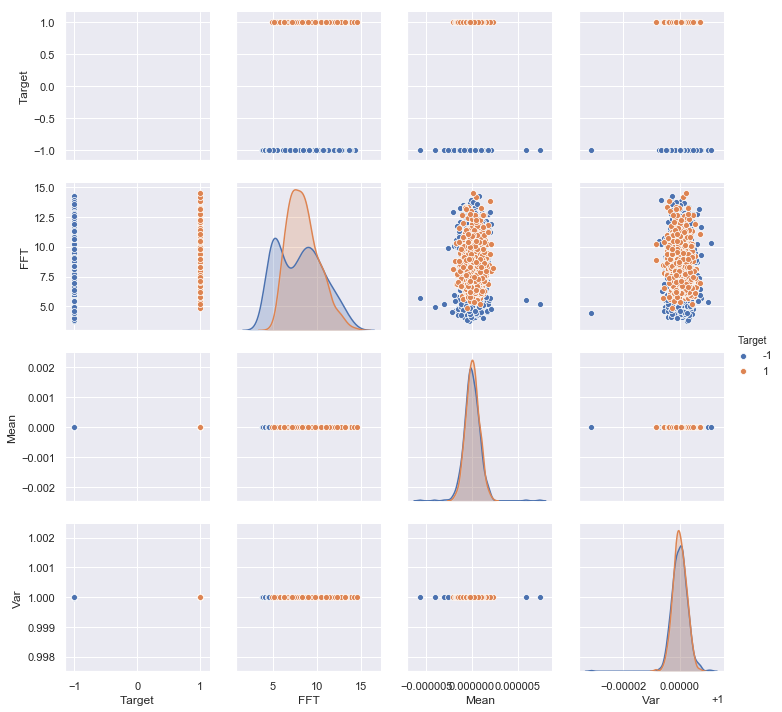

In [17]:
sns.pairplot(result ,hue = 'Target')

Represented pairplot shows, that mean and variance are non-informative features. 

Let's compute the accuracy on train dataset, using simple FFT-feature solution

In [18]:
df_test_set_1 = data_test
df_test_set_1 = df_test_set_1[df_test_set_1.Target != 1].reset_index(drop = True)
df_2_test = df_test_set_1.drop('Target', axis = 1)
d_test = np.zeros(len(df_2_test))
for i in range(len(df_2_test)):
    d_test[i] = abs(np.fft.fft(df_2_test.values[i], norm ='ortho')).max()
#d_test.size   

In [19]:
df_test_set_2 = data_test
df_test_set_2 = df_test_set_2[df_test_set_2.Target != -1].reset_index(drop = True)
df_3_test = df_test_set_2.drop('Target', axis = 1)
c_test = np.zeros(len(df_3_test))
for i in range(len(df_3_test)):
    c_test[i] = abs(np.fft.fft(df_3_test.values[i], norm ='ortho')).max()
#c_test.size    

In [20]:
data1t = pd.DataFrame()
data1t['Target'] = df_test_set_1['Target']
data1t['FFT'] = d_test
data1t['Mean'] = df_2_test.mean(axis = 1).values
data1t['Var'] = df_2_test.var(axis  = 1).values

In [21]:
data2t = pd.DataFrame()
data2t['Target'] = df_test_set_2['Target']
data2t['FFT'] = c_test
data2t['Mean'] = df_3_test.mean(axis = 1).values
data2t['Var'] = df_3_test.var(axis = 1).values

In [22]:
#combining both classes together
framest = [data1t,data2t]
test = pd.concat(framest)
test = test.reset_index(drop = True)
#test

# Simple desicion rule

In [23]:
def res(df):
    z = np.zeros(len(df))
    for i in range(len(df)):
            if 6.22815 < df['FFT'][i] < 10.999:
                z[i] = 1
            else:
                z[i] = -1
    return z

# Accuracy estimation

In [24]:
k = 0
result_1 = res(test)
for i in range(len(test)):
    if (test['Target'][i] == result_1[i]):
        k += 1
    else:
        pass
print ('accuracy:', k/len(test))

accuracy: 0.6392668703138017


The accuracy score is 63,9%, let's try another feature selection, devoted to FFT.

Let's use as a feature width of spectre. We will adapt the height of spectre to be measured (final height is 0.1)

# Another feature

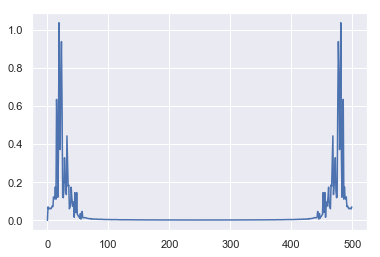

In [25]:
plt.plot(abs(np.fft.fft(df_3.values[334], norm ='ortho'))/abs(np.fft.fft(df_3.values[1], norm ='ortho')).max())

In [26]:
data = []
for i in range(len(df_3)):
    data.append(abs(np.fft.fft(df_3.values[i], norm ='ortho'))/abs(np.fft.fft(df_3.values[i], norm ='ortho')).max())
#data

In [27]:
dataa = []
for i in range(len(df_2)):
    dataa.append(abs(np.fft.fft(df_2.values[i], norm ='ortho'))/abs(np.fft.fft(df_2.values[i], norm ='ortho')).max())
#dataa

In [28]:
def width(df):
    width = 0
    for i in range(250):
        if df[i] >= 0.09:
            width += 1
    return width/500
    


In [29]:
widths = np.zeros(len(data))
for i in range(len(data)):
    widths[i] = width(data[i])
#widths

In [30]:
widthss = np.zeros(len(dataa))
for i in range(len(dataa)):
    widthss[i] = width(dataa[i])
#widthss

In [31]:
feature1 = pd.DataFrame(widths)
feature2 = pd.DataFrame(widthss)
frame = [feature1,feature2]
widthh = pd.concat(frame)
result['Width'] = widthh.reset_index(drop = True)

# Visualisation of new features

/Users/dzisandy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/dzisandy/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/dzisandy/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/dzisandy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

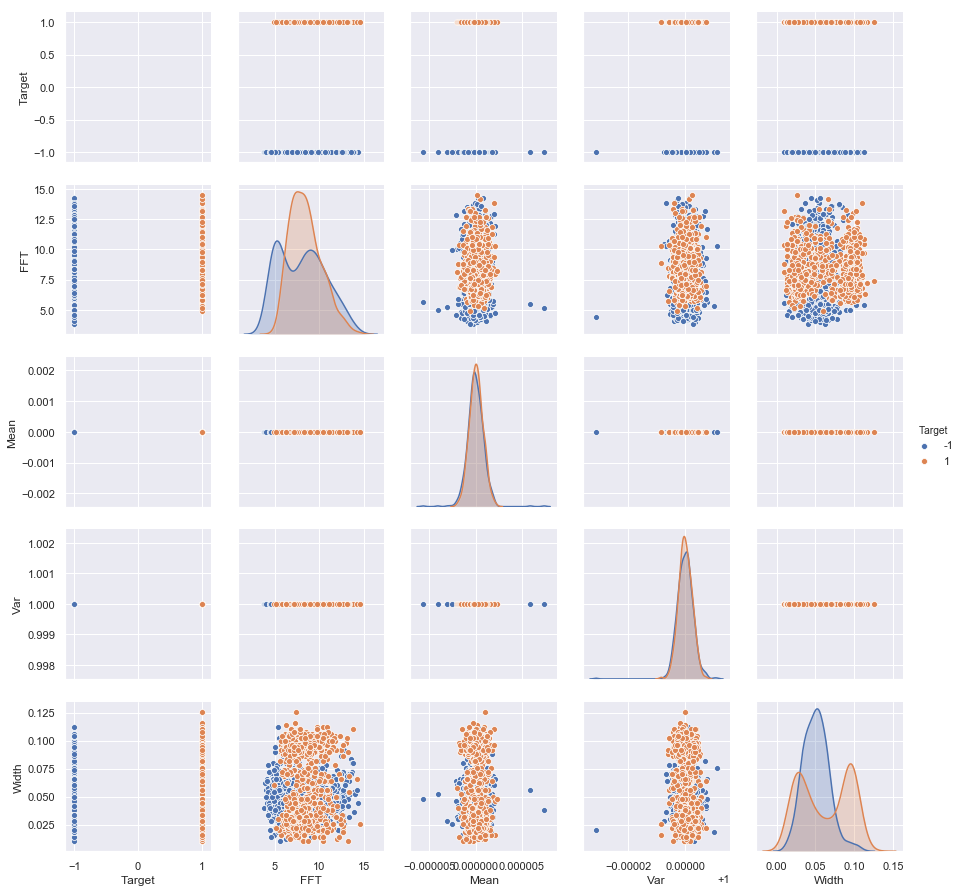

In [32]:
sns.pairplot(result ,hue = 'Target')

# Preparing test data features

In [33]:
datat = []
for i in range(len(df_3_test)):
    datat.append(abs(np.fft.fft(df_3_test.values[i], norm ='ortho'))/abs(np.fft.fft(df_3_test.values[i], norm ='ortho')).max())
#datat

In [34]:
dataat = []
for i in range(len(df_2_test)):
    dataat.append(abs(np.fft.fft(df_2_test.values[i], norm ='ortho'))/abs(np.fft.fft(df_2_test.values[i], norm ='ortho')).max())
#dataat

In [35]:
widthst = np.zeros(len(datat))
for i in range(len(data)):
    widthst[i] = width(datat[i])
#widthst

In [36]:
widthsst = np.zeros(len(dataat))
for i in range(len(dataat)):
    widthsst[i] = width(dataat[i])
#widthsst

In [37]:
feature1t = pd.DataFrame(widthst)
feature2t = pd.DataFrame(widthsst)

In [38]:
frame = [feature1t,feature2t]
widthht = pd.concat(frame)
#widthht

In [39]:
test['Width'] = widthht.reset_index(drop = True)

In [40]:
#test

# Simple desicion rule #2

In [41]:
def res1(df):
    z = np.zeros(len(df))
    for i in range(len(df)):
            if (0.0131 < df['Width'][i] or df['Width'][i] > 0.071) and 5.6739 < df['FFT'][i] < 14.0999:
                z[i] = 1
            else:
                z[i] = -1
    return z

# Final accuracy score

In [42]:
k = 0
result_2 = res1(test)
for i in range(len(test)):
    if (test['Target'][i] == result_2[i]):
        k += 1
    else:
        pass
print ('accuracy:', k/len(test))

accuracy: 0.83365731741183


Final accuracy on features max(FFT) + width of spectre (on height 0.09 from max) is about 83,4%